In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wine_data.csv',header=None , usecols=[0,1,2])

In [6]:
df.columns=['Class-label','Alcohol','Malic Acid']
df.sample(7)

,Class-label,Alcohol,Malic Acid
162,3,12.85,3.27
37,1,13.05,1.65
173,3,13.71,5.65
110,2,11.46,3.74
63,2,12.37,1.13
101,2,12.60,1.34
74,2,11.96,1.09


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

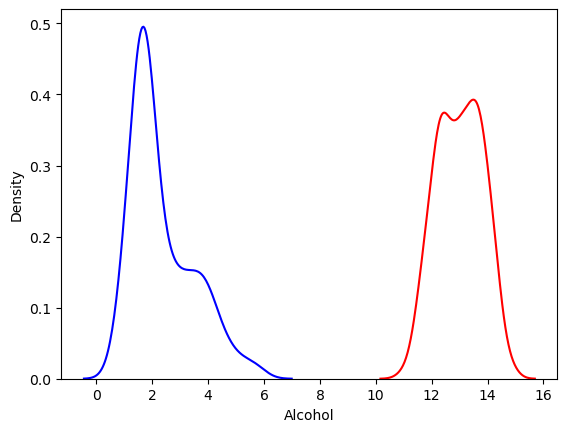

In [9]:
sns.kdeplot(df['Alcohol'] ,color='red')  #distribution function
sns.kdeplot(df['Malic Acid'] ,color='blue')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

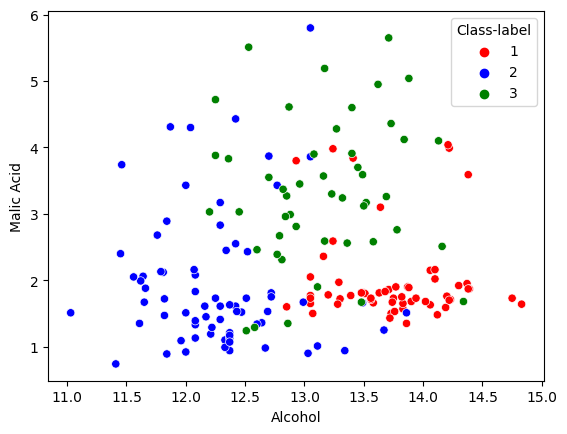

In [16]:
colors={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic Acid'],hue=df['Class-label'],palette=colors)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class-label' ,axis=1),
                                              df['Class-label'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [29]:
#sklearn classes changes dataframe to numpy array we have to bring it back to df
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_scaled.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_scaled.columns)

In [30]:
np.round(X_train.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [31]:
np.round(X_train_scaled.describe())

,Alcohol,Malic Acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


## after scaling all values are in range [0,1]

Text(0.5, 1.0, 'After Scaling')

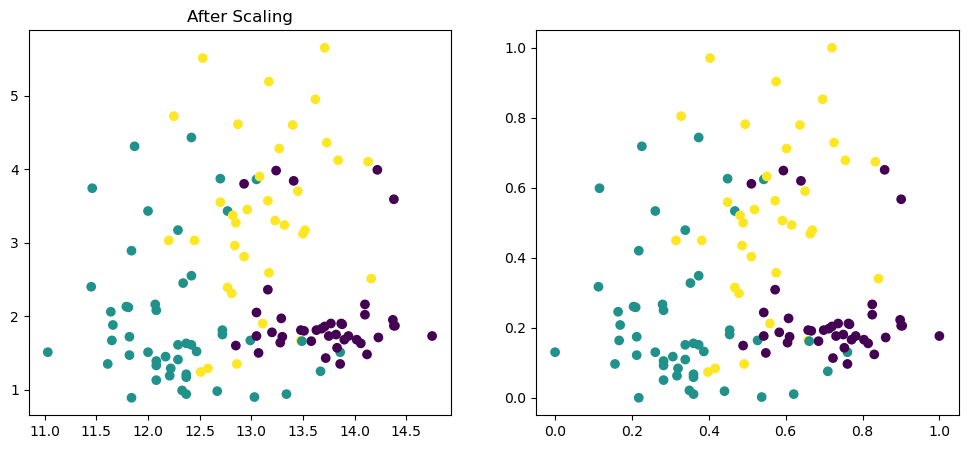

In [37]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax1.set_title('After Scaling') 

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

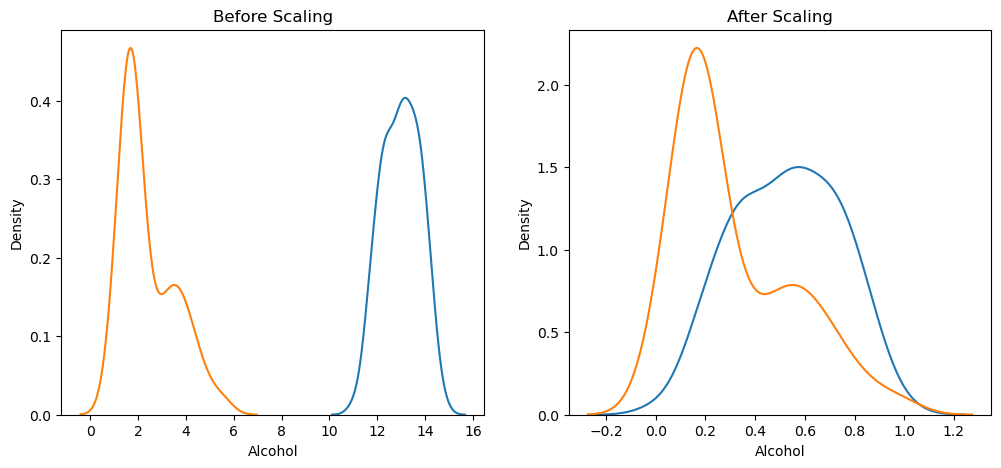

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)


<AxesSubplot:title={'center':'Alcohol distribution after scaling'}, xlabel='Alcohol', ylabel='Density'>

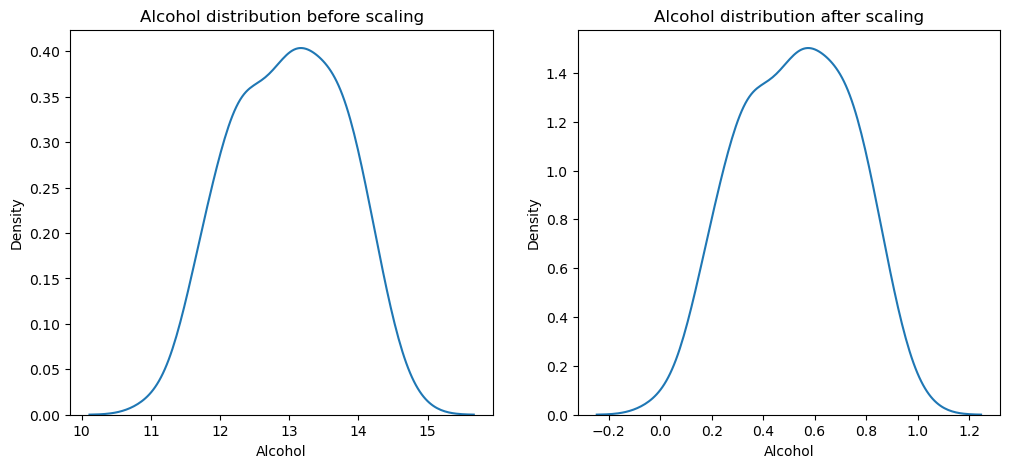

In [42]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Alcohol distribution before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
ax2.set_title('Alcohol distribution after scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)


<AxesSubplot:title={'center':'Malic distribution after scaling'}, xlabel='Malic Acid', ylabel='Density'>

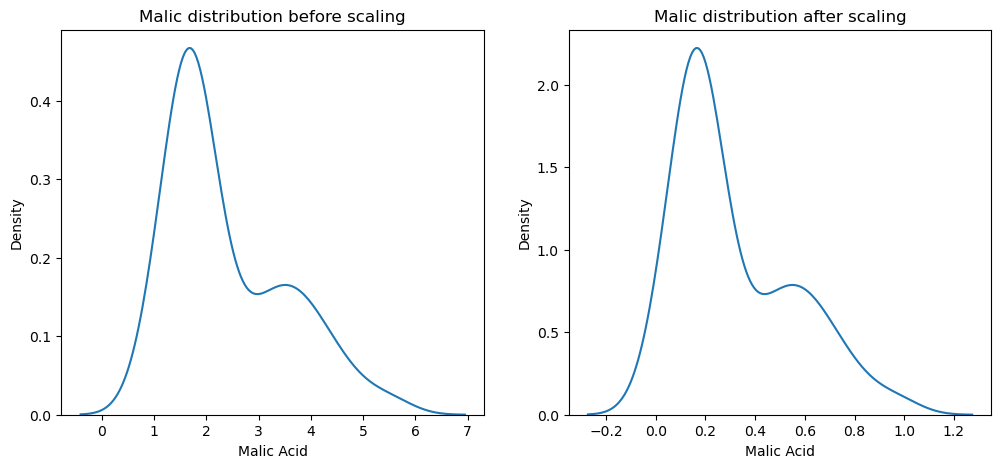

In [43]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Malic distribution before scaling')
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax2.set_title('Malic distribution after scaling')
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)